# Benchmark Notebook

This notebook runs the instances of the Benchmark class to execute the PyMC and PySTAN models in sequence, so that we can compare the two libraries (and some of its hyperparameters) in terms of computational performance

## Methodology
For N number of times for each sample size, we
- sample with replacemenets a number of users from the Lifetime Value dataset the defined sample size
- we always run the models in the following order: PYMC, PySTAN, PyMC-nutpie, and PyMC-numpyro
- we compile/fit and sample the posterior of the probabilistic models without having any other program or tab (clearly) open at the same time. Ideally, we would run the moder in a virtual machine/kubernets to ensure that the models always use the same resources, but this would take a time I didn't have. This is on my TODO list
- I show the calls for both benchmarks on the same notebook. In reality, this was done in two separate notebooks and with no other notebook running. It is organized like this just to be simpler to find the code

## Results
The results for the benchmarks comparing PyMC (and its variants) against PySTAN, as well as the two implementations of a Random Walk can be see at the end

In [ ]:
import nest_asyncio
nest_asyncio.apply()

from src.Benchmark import Benchmarker
from datetime import datetime, timedelta

In [3]:
# Benchmark PyMC vs PySTAN
benchmarker = Benchmarker(
    date_end = datetime(2019, 3, 1),
    sample_sizes = [5000, 10000, 20000], 
    n_iterations=30)

benchmarker.benchmark()

In [ ]:
# Benchmark pymc.GaussianRandomWalk
benchmarker = Benchmarker(
    date_end = datetime(2019, 3, 1),
    sample_sizes = [5000, 10000, 20000], 
    n_iterations=30)

benchmarker.pymc_classes_benchmark()

# Results
## PyMC vs PySTAN vs PyMC-nutpie vs PyMC-numpyro


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np


sns.set_style('whitegrid')

In [14]:
benchmark_data = pd.read_csv('./results/PyData_Amsterdam_2023_pymc_pystan_results.csv')
benchmark_data = benchmark_data[['sample_size', 'pymc_time', 'pystan_exec_times', 'nutpie_exec_times', 'numpyro_exec_times']]
benchmark_data = benchmark_data.rename(columns={'pymc_time': "PyMC", 'pystan_exec_times': "PYSTAN", 'nutpie_exec_times': 'PyMC - Nutpie Sampler', 'numpyro_exec_times': 'PyMC - Numpyro Sampler'})
benchmark_data = benchmark_data.melt(['sample_size'])

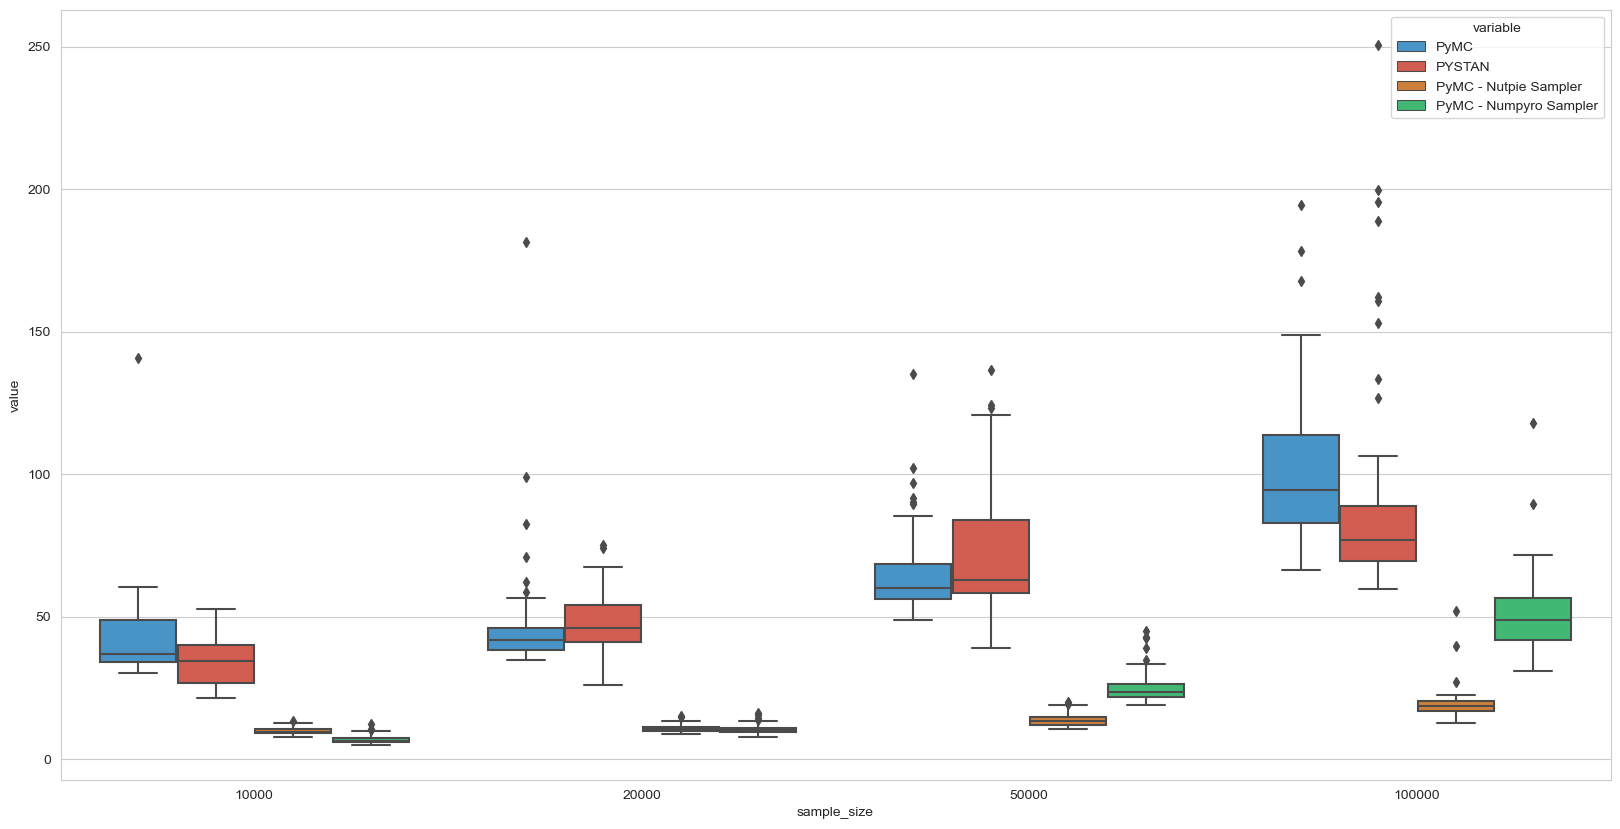

In [15]:
colors = ["#3498db", "#e74c3c", "#e67e22", "#2ecc71"] 
g = sns.boxplot(data=benchmark_data, x='sample_size', y='value', hue='variable', palette=colors)
g.figure.set_size_inches(20, 10)

## PyMC: GaussianRandomWalk vs Purely statistical distributions

In [18]:
benchmark_data = pd.read_csv('./results/PyData_Amsterdam_2023_pymc_classes_comparison.csv')
benchmark_data = benchmark_data[['sample_size', 'Base Distributions', 'GaussianRandomWalk']]
benchmark_data = benchmark_data.melt(['sample_size'])

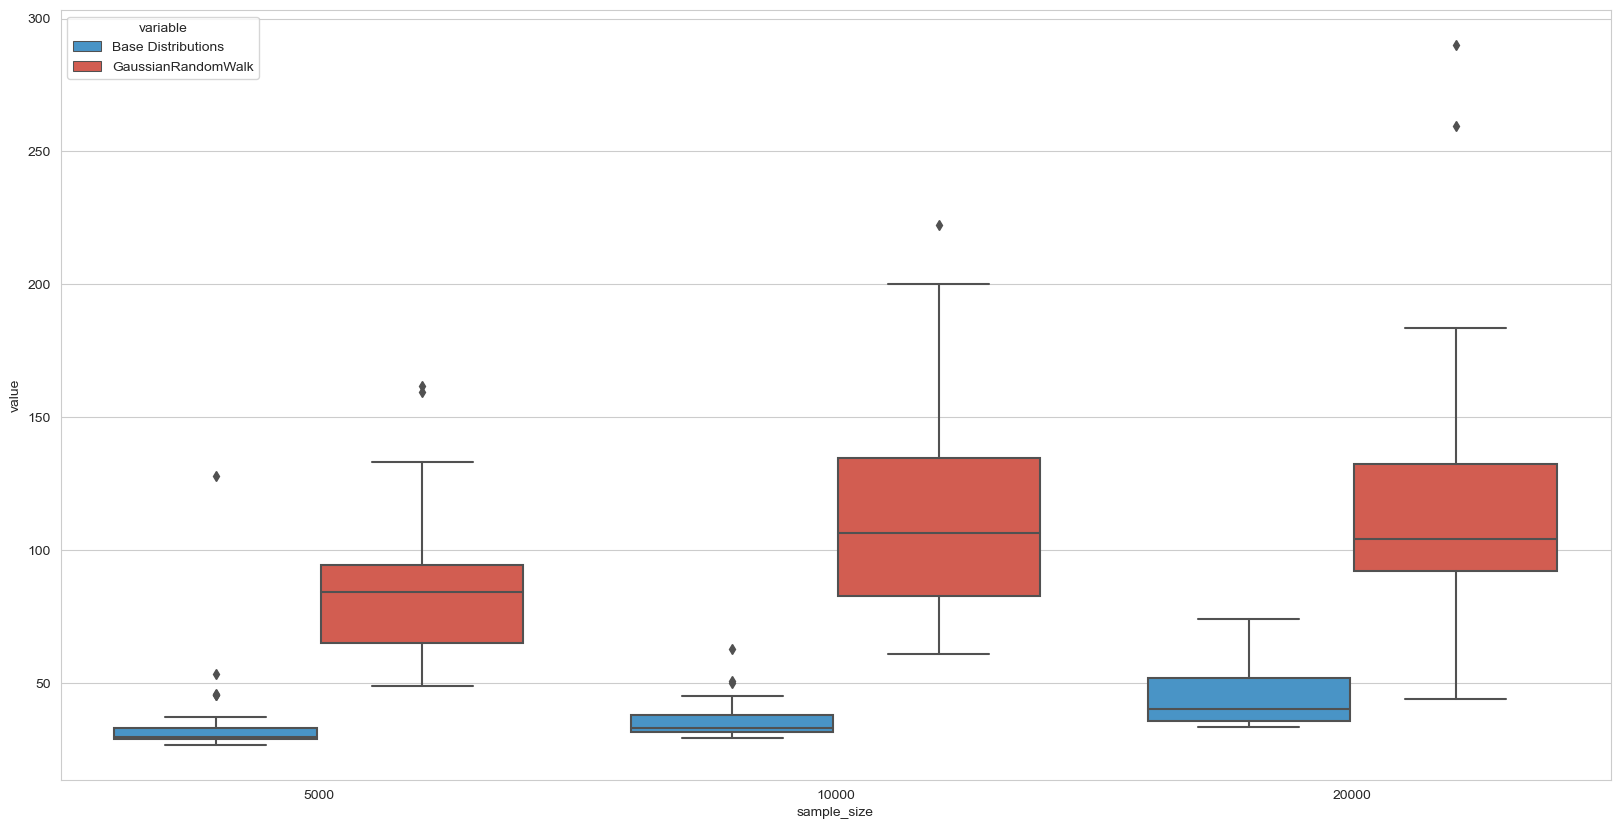

In [19]:
colors = ["#3498db", "#e74c3c", "#e67e22", "#2ecc71"] 
g = sns.boxplot(data=benchmark_data, x='sample_size', y='value', hue='variable', palette=colors)
g.figure.set_size_inches(20, 10)